<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/logisticregresionassignment_WITH_Deploymnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.
Detailed deployment instructions are available in the Streamlit Documentation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train=pd.read_csv('/content/Titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.Cabin.value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [ ]:
train.drop(columns='Cabin',inplace=True)

In [ ]:
train.duplicated().sum()

np.int64(111)

In [ ]:
train.drop_duplicates(inplace=True)

In [ ]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

/tmp/ipython-input-11-189249602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)


In [ ]:
train.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.81275148,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [ ]:

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-13-1064119083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)


In [ ]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
(train.groupby(['Survived','Sex'])['Survived'].count())

Survived  Sex   
0         female     76
          male      382
1         female    216
          male      106
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

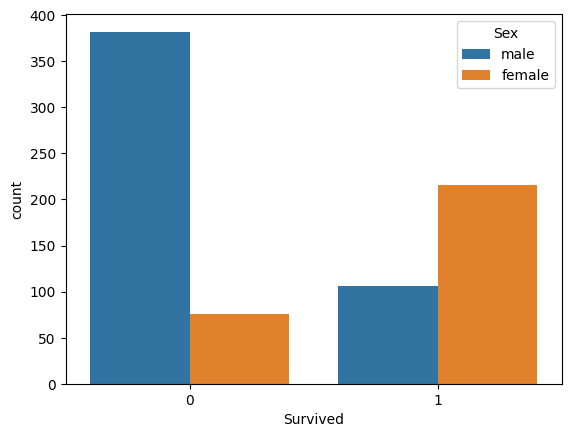

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

In [ ]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

<Axes: xlabel='Survived', ylabel='count'>

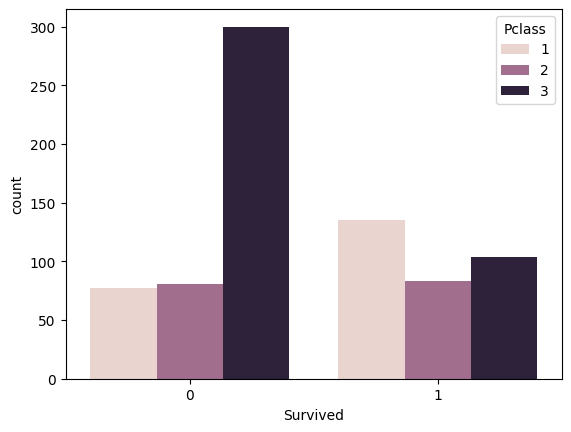

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<Axes: xlabel='Survived', ylabel='Fare'>

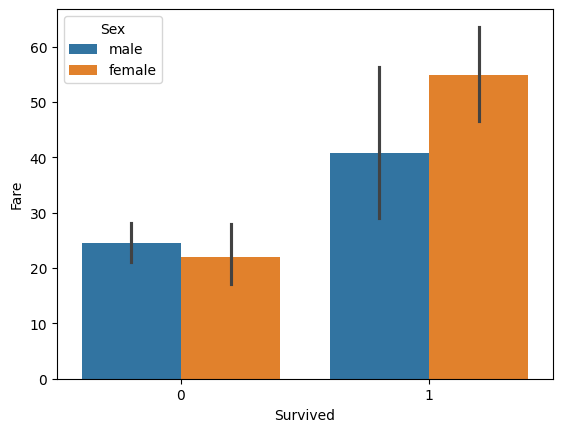

In [ ]:
sns.barplot(x='Survived',y='Fare',data=train,hue='Sex')

In [ ]:
train.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,458.0,30.723425,13.405463,1.00,22.00,29.812751,37.00,74.0
1,322.0,28.517445,14.048545,0.42,20.25,29.812751,35.75,80.0


In [ ]:
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.336244,-0.079277,-0.037597,0.069669,0.246669
Pclass,-0.336244,1.000000,-0.338325,0.086788,0.038975,-0.552440
Age,-0.079277,-0.338325,1.000000,-0.280082,-0.187311,0.090414
SibSp,-0.037597,0.086788,-0.280082,1.000000,0.380596,0.134127
Parch,0.069669,0.038975,-0.187311,0.380596,1.000000,0.191055
Fare,0.246669,-0.552440,0.090414,0.134127,0.191055,1.000000


In [ ]:
# drop column with minimum relationship
train.drop(columns='SibSp',inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train[['Age','Fare']] = sc.fit_transform(train[['Age','Fare']])
train = pd.get_dummies(train,dtype='int')
train.corr(numeric_only=True)

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.336244,-0.079277,0.069669,0.246669,0.513615,-0.513615,0.169752,-0.039142,-0.128985
Pclass,-0.336244,1.000000,-0.338325,0.038975,-0.552440,-0.117507,0.117507,-0.248909,0.210159,0.099177
Age,-0.079277,-0.338325,1.000000,-0.187311,0.090414,-0.093589,0.093589,0.038727,-0.017213,-0.024549
Parch,0.069669,0.038975,-0.187311,1.000000,0.191055,0.236962,-0.236962,-0.022168,-0.065551,0.058454
Fare,0.246669,-0.552440,0.090414,0.191055,1.000000,0.169307,-0.169307,0.275371,-0.109335,-0.182246
Sex_female,0.513615,-0.117507,-0.093589,0.236962,0.169307,1.000000,-1.000000,0.086134,0.043289,-0.102634
Sex_male,-0.513615,0.117507,0.093589,-0.236962,-0.169307,-1.000000,1.000000,-0.086134,-0.043289,0.102634
Embarked_C,0.169752,-0.248909,0.038727,-0.022168,0.275371,0.086134,-0.086134,1.000000,-0.141147,-0.812508
Embarked_Q,-0.039142,0.210159,-0.017213,-0.065551,-0.109335,0.043289,-0.043289,-0.141147,1.000000,-0.462431
Embarked_S,-0.128985,0.099177,-0.024549,0.058454,-0.182246,-0.102634,0.102634,-0.812508,-0.462431,1.000000


In [ ]:
test=pd.read_csv('/content/Titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.drop(['PassengerId','Name','Ticket','Cabin','SibSp'],axis=1,inplace=True)

In [ ]:
test.shape

(418, 6)

In [ ]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
Parch,0
Fare,1
Embarked,0


In [ ]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

/tmp/ipython-input-29-937964166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].mean(),inplace=True)


In [ ]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

/tmp/ipython-input-30-3411113445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(),inplace=True)


In [ ]:
test.duplicated().sum()

np.int64(43)

In [ ]:
test.drop_duplicates(inplace=True)

In [ ]:
test[['Age','Fare']] = sc.fit_transform(test[['Age','Fare']])
test = pd.get_dummies(test,dtype='int')
test.corr(numeric_only=True)

,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.455754,0.045767,-0.572548,-0.099792,0.099792,-0.340064,0.208704,0.192156
Age,-0.455754,1.000000,-0.048484,0.328056,-0.002438,0.002438,0.164528,-0.012741,-0.144309
Parch,0.045767,-0.048484,1.000000,0.213836,0.152391,-0.152391,-0.017782,-0.118591,0.085403
Fare,-0.572548,0.328056,0.213836,1.000000,0.183543,-0.183543,0.315572,-0.135523,-0.212153
Sex_female,-0.099792,-0.002438,0.152391,0.183543,1.000000,-1.000000,0.042671,0.123184,-0.111028
Sex_male,0.099792,0.002438,-0.152391,-0.183543,-1.000000,1.000000,-0.042671,-0.123184,0.111028
Embarked_C,-0.340064,0.164528,-0.017782,0.315572,0.042671,-0.042671,1.000000,-0.176090,-0.819705
Embarked_Q,0.208704,-0.012741,-0.118591,-0.135523,0.123184,-0.123184,-0.176090,1.000000,-0.419494
Embarked_S,0.192156,-0.144309,0.085403,-0.212153,-0.111028,0.111028,-0.819705,-0.419494,1.000000


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
logre=LogisticRegression()

In [ ]:
target=train['Survived']
features=train.drop(columns='Survived')
logre.fit(features,target)

LogisticRegression()

In [ ]:
features.columns

Index(['Pclass', 'Age', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
logre.predict(features)
#logre.predict(test)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [ ]:
#logre.score(test,logre.predict(test))
accuracy_score(target,logre.predict(features))

0.782051282051282

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
logre.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#y_pred=logre.predict(x_test)
#accuracy_score(y_test,y_pred)

In [ ]:
logre.predict(features)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [ ]:

logre.predict_log_proba(features)

array([[-0.1243664 , -2.14606204],
       [-2.6480656 , -0.07341838],
       [-0.85093109, -0.5568995 ],
       ...,
       [-0.6965393 , -0.68976653],
       [-0.96410131, -0.48017638],
       [-0.11335101, -2.23340621]])

In [ ]:
#y_pred1=[1 if x[1]>=0.4 else 0 for x in logre.predict_log_proba(x_test)]
#print(y_pred1)

In [ ]:
#from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
#import seaborn as sns

In [ ]:
# confusion matrix
#conf=confusion_matrix(y_test,y_pred)
#conf

In [ ]:
#sns.heatmap(conf,annot=True,cmap=plt.cm.coolwarm)
#plt.xlabel('Pred')
#plt.ylabel('Actual')
#plt.title('confusion matrix');

In [ ]:
#print(classification_report(y_test,y_pred))

In [ ]:
# roc curve
#sigmoid=logre.predict_proba(x_test)[:,1]

In [ ]:
#auc_score=roc_auc_score(y_test,sigmoid)
#auc_score

In [ ]:
#fpr,tpr,thr=roc_curve(y_test,sigmoid)

In [ ]:
'''plt.plot(fpr,tpr,color='red',linewidth=2,linestyle='-',label=f'AUC_SCORE:{auc_score:.2f}')
plt.plot([0,1],color='grey',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid()
plt.legend()'''

"plt.plot(fpr,tpr,color='red',linewidth=2,linestyle='-',label=f'AUC_SCORE:{auc_score:.2f}')\nplt.plot([0,1],color='grey',linestyle='--')\nplt.xlabel('FPR')\nplt.ylabel('TPR')\nplt.title('ROC Curve')\nplt.grid()\nplt.legend()"

In [ ]:
import pickle

In [ ]:
file=open('logre.pkl','wb')
pickle.dump(logre,file)
file.close()

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 1s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [ ]:
%%writefile titanicmodel_dep_app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the model
model = pickle.load(open('logre.pkl', 'rb'))

st.title('🛳️ Titanic Survival Predictor')
st.markdown(
    """
    Enter passenger details and I’ll estimate the probability
    that they would have survived the Titanic disaster.
    """
)

def get_user_input():
    # Sidebar inputs
    pclass = st.sidebar.selectbox('Ticket Class', [1, 2, 3], index=2)
    sex = st.sidebar.selectbox('Sex', ['male', 'female'])
    age = st.sidebar.slider('Age', 0, 80, 30)
    parch = st.sidebar.slider('Parents / Children aboard', 0, 6, 0)
    fare = st.sidebar.slider('Ticket Fare (£)', 0.0, 520.0, 32.20, step=0.10)
    embarked = st.sidebar.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

    sample = {
        'Pclass': pclass,
        'Sex': sex,
        'Age': age,
        'Parch': parch,
        'Fare': fare,
        'Embarked': embarked
    }
    return sample

sample = get_user_input()

st.subheader('User Input')
st.write(sample)

def prepare_input(data, feature_list):
    input_data = {feature: data.get(feature, 0) for feature in feature_list}
    return np.array([list(input_data.values())])

features = ['Pclass', 'Age', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

if st.button('Predict'):
    input_array = prepare_input(sample, features)
    prediction = model.predict(input_array)
    st.subheader('Prediction')
    st.write(prediction)


Overwriting titanicmodel_dep_app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.86.156.177


In [ ]:
!streamlit run titanicmodel_dep_app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.156.177:8501

⠼⠴your url is: https://shy-symbols-see.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn

**Reasoning**:
Load the training and testing data and separate the target variable from the training data.

